1-KESİN OLARAK KULLANILMAYACAK DEĞİŞKENLER

Start_Lat #zaten konum bilgileri var
Start_Lng 

Source: Indicates source of the accident report (i.e. the API which reported the accident.). #ANLAMI BELİRSİZ
    
End_Lat: Shows latitude in GPS coordinate of the end point.#BOŞ
    
End_Lng: Shows longitude in GPS coordinate of the end point.#BOŞ
    
Zipcode: Shows the zipcode in address field #GEREK YOK SANKİ
    
Country: Shows the country in address field. #TEK DEĞİŞKEN 
   
Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).##GEREK YOK SANKİ
    
Preciption: yağış miktarı #çok fazla missing var     

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.#tek değişken

    
1.1-KULLANILMAMASI MUHTEMEL DEĞİŞKENLER
Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

Distance(mi): The length of the road extent affected by the accident.

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.
    
Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.
Wind_Speed(mph): Shows wind speed (in miles per hour). #ÇOK FAZLA MİSSİNG DEĞER VAR
    
Wind_Direction: Shows wind direction. #değişkenlerin anlamlarını bilmiyoruz

    
#bu dördü aynı şey gibi. ya birini seçicez yada kaza saatine göre sabah öğlen akşam gibi zaman dilimleri oluşturacağız 
Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twiligh
    
    
GERİYE KALANLAR

Geo-Features:

Street object
County object
State object
Airport_Code object

Accident-Features:
Severity int64
Distance(mi) float64
Description object
Amenity bool
Bump bool
Crossing bool
Give_Way bool
Junction bool
No_Exit bool
Railway bool
Roundabout bool
Station bool
Stop bool
Traffic_Calming bool
Traffic_Signal bool

Weather-Condition:


Temperature(F) float64
Humidity(%) float64
Pressure(in) float64
Visibility(mi) float64
Wind_Direction object
Weather_Condition object
Time-Features:

Start_Time object
End_Time object







In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
def reduce_mem(df):
    starttime = time.time()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction),time spend:{:2.2f} min'.format(end_mem,
                                                                                                           100*(start_mem-end_mem)/start_mem,
                                                                                                           (time.time()-starttime)/60))
    return df

In [6]:
df = reduce_mem(pd.read_csv("US_Accidents_June20.csv"))

-- Mem. usage decreased to 710.38 Mb (29.6% reduction),time spend:0.03 min


In [7]:
df_train = df.copy()

In [5]:
df_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8750,-84.0625,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9375,-82.8125,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0625,-84.0625,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7500,-84.1875,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6250,-84.1875,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df_train.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [7]:
df_train.drop(["Country"],axis=1,inplace=True)

In [8]:
df_train.drop(["Start_Lat","End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)","Start_Lng","Railway","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"], axis=1,inplace=True)

In [9]:
df_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,Crossing,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.010002,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,False,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.010002,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,False,False
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.010002,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,False,False,True,False
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.010002,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,False,False
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.010002,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,False,False,True,False


In [10]:
df.memory_usage().sum() / 1024**2

710.3795356750488

In [11]:
def null_percent(df):
    df_size = len(df)
    for i in df:
        print(i, " ----->  ", df[i].isna().sum()/df_size*100)
        
def current_mem_use(df):
    return "Current memory usage is: " + str(round(df.memory_usage().sum() / 1024**2,2)) + " MB."

In [12]:
null_percent(df_train)
current_mem_use(df_train)

ID  ----->   0.0
Source  ----->   0.0
TMC  ----->   29.451104090172603
Severity  ----->   0.0
Start_Time  ----->   0.0
End_Time  ----->   0.0
Distance(mi)  ----->   0.0
Description  ----->   2.8460700184453798e-05
Street  ----->   0.0
Side  ----->   0.0
City  ----->   0.0031875984206588253
County  ----->   0.0
State  ----->   0.0
Zipcode  ----->   0.030424488497181112
Timezone  ----->   0.11042751671568073
Airport_Code  ----->   0.19233741184653877
Weather_Timestamp  ----->   1.2330029140910919
Temperature(F)  ----->   1.870778744524517
Humidity(%)  ----->   1.983340813754032
Pressure(in)  ----->   1.590440847707647
Visibility(mi)  ----->   2.1589148731919274
Wind_Direction  ----->   1.675595262659533
Wind_Speed(mph)  ----->   12.938490450154358
Weather_Condition  ----->   2.166940790643943
Amenity  ----->   0.0
Bump  ----->   0.0
Crossing  ----->   0.0
Give_Way  ----->   0.0
Junction  ----->   0.0
No_Exit  ----->   0.0
Roundabout  ----->   0.0
Station  ----->   0.0
Stop  ----->   0.0


'Current memory usage is: 519.38 MB.'

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 50 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float16
 3   Severity               int8   
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float16
 7   Start_Lng              float16
 8   End_Lat                float16
 9   End_Lng                float16
 10  Distance(mi)           float16
 11  Description            object 
 12  Number                 float32
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

GEO FEATURES

In [52]:
df_train.County.value_counts().keys()

Index(['Los Angeles', 'Harris', 'Orange', 'Mecklenburg', 'Dallas', 'Travis',
       'Montgomery', 'Wake', 'Maricopa', 'Alameda',
       ...
       'Saint James', 'Yancey', 'Fleming', 'Coffey', 'Frontier', 'Towns',
       'Woods', 'Republic', 'Hyde', 'Jack'],
      dtype='object', length=1724)

In [ ]:
sns.boxplot(df_train["County"])

In [14]:
len(df_train["County"].unique())

1724

In [15]:
df_train["County"].mode()

0    Los Angeles
dtype: object

In [ ]:
df_train.State.value_counts()

In [16]:
df_train.describe()

,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2478818.0,3.513617e+06,3.513617e+06,3447885.000,3443930.0,3.457735e+06,3437761.0,3059008.0
mean,NaN,2.339929e+00,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.521935e-01,NaN,0.000,0.0,0.000000e+00,0.0,NaN
min,200.0,1.000000e+00,0.000000e+00,-89.000,1.0,0.000000e+00,0.0,0.0
25%,201.0,2.000000e+00,0.000000e+00,50.000,48.0,2.973438e+01,10.0,5.0
50%,201.0,2.000000e+00,0.000000e+00,64.000,67.0,2.995312e+01,10.0,7.0
75%,201.0,3.000000e+00,1.000214e-02,75.875,84.0,3.009375e+01,10.0,11.5
max,406.0,4.000000e+00,3.337500e+02,170.625,100.0,5.775000e+01,140.0,984.0


In [17]:
df_train["Start_Time"].mode()

0    2017-05-15 09:22:55
dtype: object

In [42]:
df_train["Weather_Condition"].value_counts()

Clear                           808202
Fair                            547721
Mostly Cloudy                   488094
Overcast                        382485
Partly Cloudy                   344815
                                 ...  
Drifting Snow                        1
Dust Whirls                          1
Thunder and Hail / Windy             1
Thunder / Wintry Mix / Windy         1
Sand / Dust Whirls Nearby            1
Name: Weather_Condition, Length: 127, dtype: int64

In [44]:
df_train["Wind_Direction"].value_counts()

Calm        368282
CALM        217424
SSW         181645
South       177225
WNW         174115
SW          172252
WSW         165738
NW          164928
West        164624
SSE         163649
North       153252
NNW         147047
SE          132051
NNE         117475
NE          115931
ESE         114855
Variable    113897
ENE         112626
S           103970
East        103462
W            95115
N            70516
VAR          64523
E            60141
Name: Wind_Direction, dtype: int64

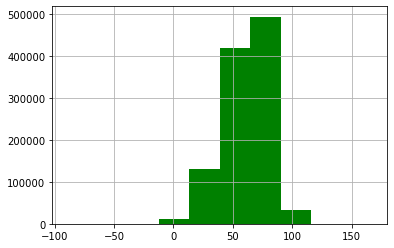

In [18]:
df_train[df_train["Severity"] > 2]["Temperature(F)"].hist( facecolor='g')#sıcaklığın kazalara bir etkisi yok gibi(100F = 37C)


In [19]:
df_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,Crossing,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.010002,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,False,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.010002,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,False,False
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.010002,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,False,False,True,False
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.010002,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,False,False
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.010002,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,False,False,True,False


In [20]:
df_train.drop(["Temparature(C)"], axis=1,inplace=True)

KeyError: "['Temparature(C)'] not found in axis"

In [26]:
df_train["Temperature(C)"] = ((df_train["Temperature(F)"]-32)*5)/9
df_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C)
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8750,-84.0625,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2.726562
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9375,-82.8125,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,3.281250
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0625,-84.0625,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2.222656
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7500,-84.1875,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,1.718750
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6250,-84.1875,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2.222656


In [33]:
df_train.Wind_Direction.value_counts().keys()

Index(['Calm', 'CALM', 'SSW', 'South', 'WNW', 'SW', 'WSW', 'NW', 'West', 'SSE',
       'North', 'NNW', 'SE', 'NNE', 'NE', 'ESE', 'Variable', 'ENE', 'S',
       'East', 'W', 'N', 'VAR', 'E'],
      dtype='object')

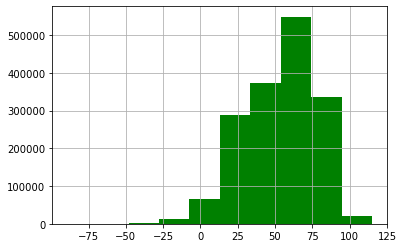

In [30]:
df_train["Wind_Chill(F)"].hist( facecolor='g')

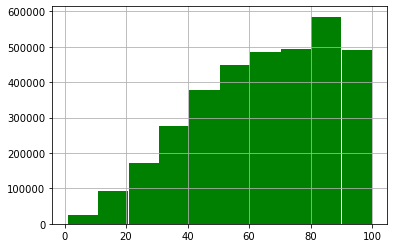

In [31]:
df_train["Humidity(%)"].hist( facecolor='g')#Yüzde 40'ın altında düşük nem oranından, yüzde 60 ve üzerinde ise yüksek nem oranından söz edilir.

In [38]:
df_train["Temperature(C)"].value_counts().head(20)

20.000000    77167
25.000000    75531
15.000000    72519
22.781250    67819
17.218750    64722
22.218750    64092
21.109375    63667
17.781250    63454
23.890625    63140
18.890625    61665
16.109375    61035
10.000000    58788
13.890625    57923
26.109375    56532
12.218750    53875
12.781250    52418
27.218750    51459
27.781250    48621
11.109375    47260
30.000000    45691
Name: Temperature(C), dtype: int64

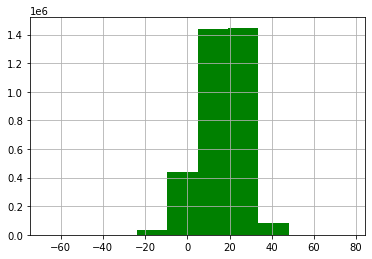

In [29]:
df_train["Temperature(C)"].hist( facecolor='g')#sıcaklığın kazalara bir etkisi yok gibi(100F = 37C)


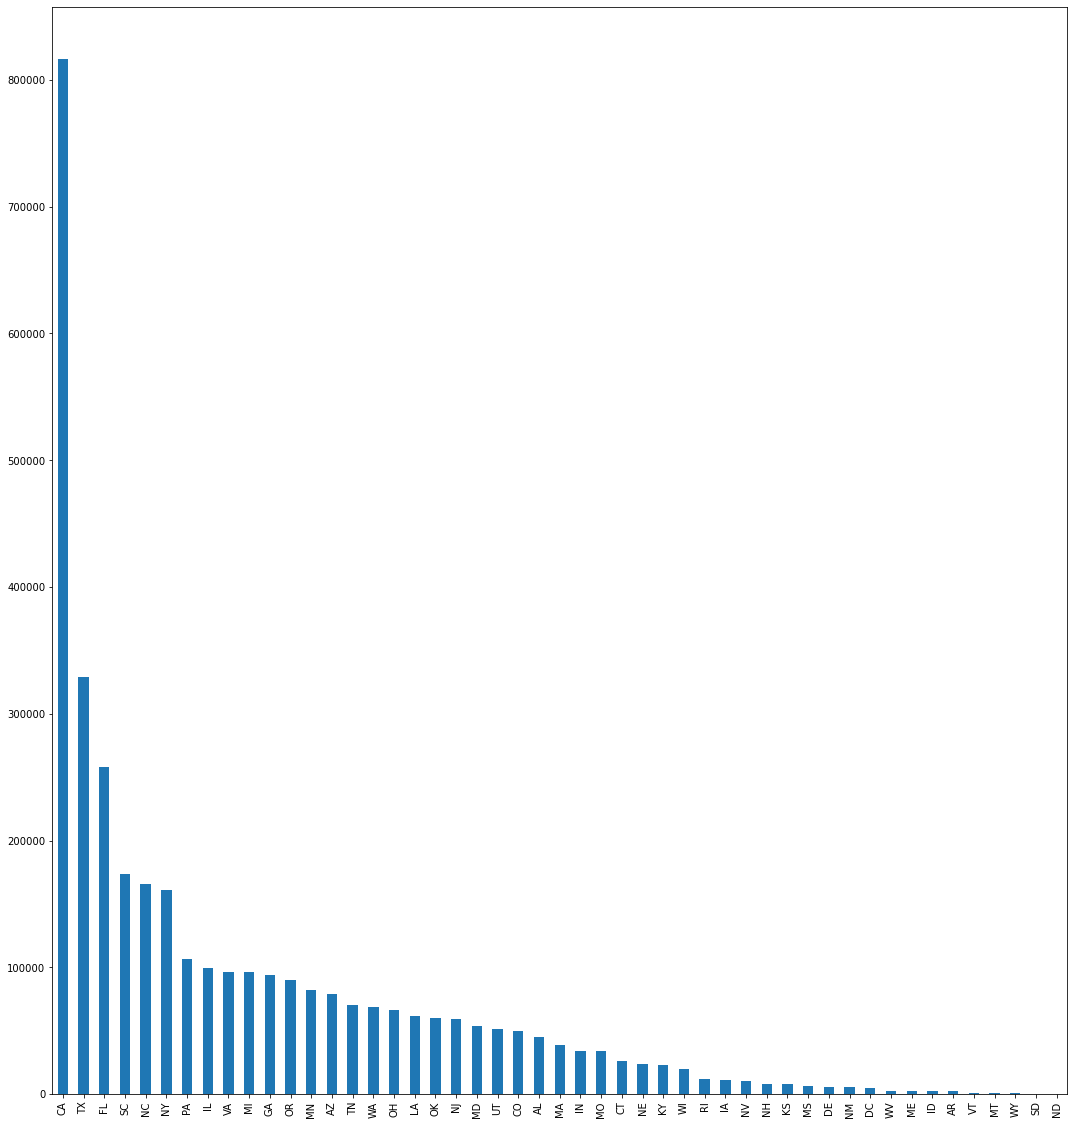

In [28]:
plt.figure(figsize=(40,20))

plt.subplot(1,2,1);df_train.State.value_counts().plot(kind = "bar")

In [29]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [30]:
dataInfo=dataframeInformations(df_train)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
Variable,,,,,,
Airport_Code,3513617,6758,0.19,object,"[KFFO, KCMH, KI69, KDAY, KMGY, KTZR, KOSU, KLC...",2002
Amenity,3513617,0,0.00,bool,"[False, True]",2
Bump,3513617,0,0.00,bool,"[False, True]",2
City,3513617,112,0.00,object,"[Dayton, Reynoldsburg, Williamsburg, Westervil...",11896
County,3513617,0,0.00,object,"[Montgomery, Franklin, Clermont, Licking, Fair...",1724
Crossing,3513617,0,0.00,bool,"[False, True]",2
Description,3513617,1,0.00,object,[Right lane blocked due to accident on I-70 Ea...,1780093
Distance(mi),3513617,0,0.00,float16,"[0.01, 0.0, 1.32, 1.09, 1.28, 0.48, 1.67, 0.94...",6290
End_Time,3513617,0,0.00,object,"[2016-02-08 11:00:00, 2016-02-08 06:37:59, 201...",3246120


In [31]:
df_train.drop(["Turning_Loop"], axis=1,inplace=True)

In [32]:
df.drop(['Weather_Timestamp'],axis=1,inplace=True)

In [33]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

In [ ]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=missing_value_df["percent_missing"], y=missing_value_df.index, ax=ax)
ax.set_title("Missing value percent for each feature", fontsize=16)
ax.set_xlabel("missing percent", fontsize=16)
ax.set_ylabel("feature name", fontsize=16)
plt.show()
plt.close()

In [ ]:
df_train.Source.unique()#anlamları ne ? 

In [22]:
df_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,Crossing,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.010002,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,False,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.010002,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,False,False
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.010002,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,False,False,True,False
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.010002,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,False,False
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.010002,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
plt.figure(figsize=(40,20))

plt.subplot(1,2,1);df_train.Start_Time.value_counts().plot(kind = "bar")

In [28]:
df_train.Start_Time.mode()

0    2017-05-15 09:22:55
dtype: object

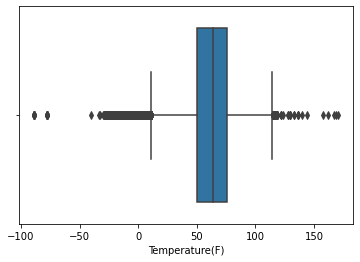

In [14]:
sns.boxplot(df_train["Temperature(F)"])

In [27]:
df_train["Temperature(C)"].min(),df_train["Temperature(C)"].max()
#Bu değerlerde sıkıntı olabilir mi? Gerçekçi gelmedi. (Fahreneit dönüşümünde bir sorun yok)

(-67.25, 77.0)